
# Dexplot

Dexplot is a Python library for delivering beautiful data visualizations. It's aim is to be powerful with a simple and intuitive user experience.

## Goals

The primary goals for dexplot are:

* Maintain a very consistent API with as few functions as necessary to make the desired statistical plots
* Allow the user to tweak the plots without digging into matplotlib

## Installation

`pip install dexplot`

## Built for long and wide data

Dexplot is primarily built for long data, which is a form of data where each row represents a single observation and each column represents a distinct quantity. It is often referred to as "tidy" data.

Dexplot also has the ability to handle wide data, where multiple columns may contain values that represent the same kind of quantity.

## Usage

Dexplot provides a small number of powerful functions that all work similarly. Most plotting functions have the following signature:

```python
dxp.plotting_func(x, y, data, aggfunc, split, row, col, orientation, ...)
```

* `x` - Column name along the x-axis
* `y` - Column name the y-axis
* `data` - Pandas DataFrame
* `aggfunc` - String of pandas aggregation function, 'min', 'max', 'mean', etc...
* `split` - Column name to split data into distinct groups
* `row` - Column name to split data into distinct subplots row-wise
* `col` - Column name to split data into distinct subplots column-wise
* `orientation` - Either vertical (`'v'`) or horizontal (`'h'`). Default for most plots is vertical.

When `aggfunc` is provided, `x` will be the grouping variable and `y` will be aggregated when vertical and vice-versa when horizontal. The best way to learn how to use dexplot is with the examples below.

## Comparison with Seaborn

If you have used the seaborn library, then you should notice a lot of similarities. Much of Dexplot was inspired by Seaborn. Below is a list of the extra features in dexplot not found in seaborn

* The ability to graph relative frequency percentage and normalize over any number of variables
* Far fewer public functions
* No need for multiple functions to do the same thing
* Ability to make grids with a single function instead of having to use a higher level function like `catplot`
* Pandas `groupby` methods are available as strings
* Ability to sort by values
* Ability to sort x/y labels lexicographically
* Both x/y-labels and titles are automatically wrapped so that they don't overlap
* The figure size (plus several other options) and available to change without using matplotlib
* Only matplotlib objects are returned

## Examples

Most of the examples below use long data.

## Bar Charts

The examples come from the Airbnb dataset, which contains many property rental listings from the Washington D.C. area.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dexplot as dxp
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
airbnb = dxp.load_dataset('airbnb')
airbnb.head()

,neighborhood,property_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,rating,superhost,response_time,latitude,longitude
0,Shaw,Townhouse,16,3.5,4,433,250,95.0,0,within an hour,38.90982,-77.02016
1,Brightwood Park,Townhouse,4,3.5,4,154,50,97.0,0,NaN,38.95888,-77.02554
2,Capitol Hill,House,2,1.5,1,83,35,97.0,1,within an hour,38.88791,-76.99668
3,Shaw,House,2,2.5,1,475,0,98.0,0,NaN,38.91331,-77.02436
4,Kalorama Heights,Apartment,3,1.0,1,118,15,91.0,0,within an hour,38.91933,-77.04124


In [3]:
airbnb.shape

(4902, 12)

There are nearly 5,000 listings in our dataset. We will use bar charts to aggregate the data.

### Vertical bar charts

In order to performa an aggregation, you must supply a value for `aggfunc`. Here, we find the median price per neighborhood. Notice that the column names automatically wrap.

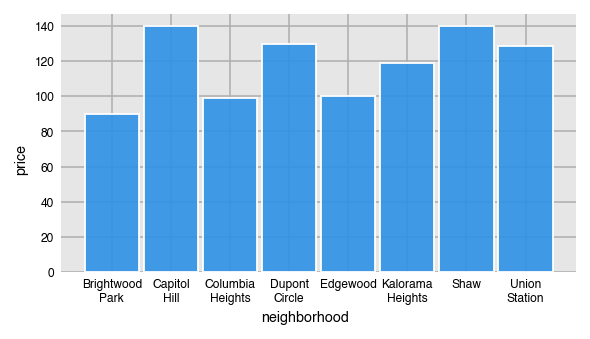

In [6]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median')

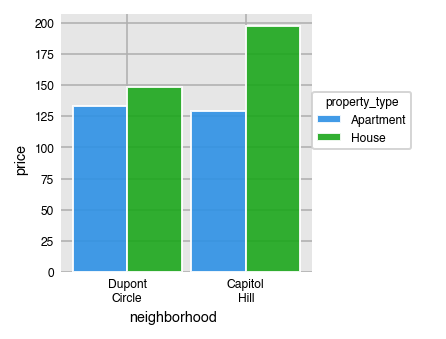

In [4]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', split='property_type',
       split_order=['Apartment', 'House'], x_order=['Dupont Circle', 'Capitol Hill'])

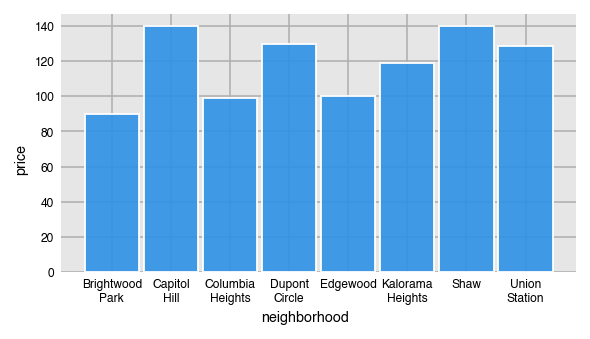

### 

In [ ]:
airbnb.groupby('neighborhood').agg({'price': 'median'})

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(x='neighborhood', y='price', data=airbnb, estimator=np.median)
ax.figure.set_dpi(144)